                                         Practical Data Science, A3
                                      Vasileios Ilias Drouzas, ID: f3352301
                                      
We will use the data of a competition that challenges participants to develop a model that can accurately detect whether an essay was written by a (middle/high school) student or by an LLM. Download the data from the [challenge](https://www.kaggle.com/competitions/llm-detect-ai-generated-text), which will comprise student-written essays and (well, toy) LLM-generated ones. The test data of the competition are expected to comprise essays generated by a variety of LLMs and which are hard to distinguish from the ones generated by students. In this assignment, however, you are expected to create your own evaluation data.  



<font size="5">A. Data Augmentation</font>

In [1]:
# ! git clone https://github.com/ipavlopoulos/lm.git

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lm.markov.models import LM
import pandas as pd
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Drogias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:

DIR = 'C:/Users/Drogias/OneDrive/Υπολογιστής/MSc Data Science AUEB/1st semester/Practical Data Science/Projects/A3/'
data = pd.read_csv(DIR + 'train_essays.csv')
cars = data[(data.generated==0)&(data.prompt_id==0)]
cities = data[(data.generated==0)&(data.prompt_id==1)]
cars.sample()

,id,prompt_id,text,generated
563,69e81017,0,There are plenty of advantages fellow citizens...,0


In [3]:
car_corpus = "\n".join(cars.text.values)
lm_cars = LM(gram="CHAR",n=4).train(car_corpus)

cities_corpus = "\n".join(cities.text.values)
lm_cities = LM(gram="CHAR", n=4).train(cities_corpus)

In [4]:
student_car_essays = cars.text
student_car_essays.dropna()
student_car_essays = student_car_essays.reset_index(drop=True)
print(student_car_essays)

student_city_essays = cities.text
student_city_essays.dropna()
student_city_essays = student_city_essays.reset_index(drop=True)
print(student_city_essays)

0      Cars. Cars have been around since they became ...
1      Transportation is a large necessity in most co...
2      "America's love affair with it's vehicles seem...
3      How often do you ride in a car? Do you drive a...
4      Cars are a wonderful thing. They are perhaps o...
                             ...                        
702    studies have shown that passenger cars are res...
703    Limiting car usage has many advantages. Such a...
704    There's a new trend that has been developing f...
705    As we all know cars are a big part of our soci...
706    Cars have been around since the 1800's and hav...
Name: text, Length: 707, dtype: object
0      The electrol college system is an unfair syste...
1      Dear state senator, It is the utmost respect t...
2      "It's official: The electoral college is unfai...
3      The Electoral College has been kept for centur...
4      Dear senator, Retain the Electoral College. Th...
                             ...                 

In [5]:
#Car essays
chars  = 0
for i in range(len(student_car_essays)):
    chars = chars + len(student_car_essays[i])

average_cars = chars / len(student_car_essays)
print("Average amount of characters per student:", int(average_cars))

Average amount of characters per student: 3253


In [6]:
#City essays
chars  = 0
for i in range(len(student_city_essays)):
    chars = chars + len(student_city_essays[i])

average_cities = chars / len(student_city_essays)
print("Average amount of characters per student:", int(average_cities))

Average amount of characters per student: 3086


1. Prompt an LLM to generate essays, so that you balance the data (use both prompts provided by the challenge).

In [7]:
import pandas as pd

# Read the CSV file, skipping the first row (header) to get the second row as data
data2 = pd.read_csv(DIR + 'GPT essays.csv', header=None, skiprows=1)


car_extra_essays = []
city_extra_essays = []
for i in range (1, 108):
    car_extra_essays.append(data2[i][0])
    city_extra_essays.append(data2[i][1])



In [8]:
LLM_cars_essays = []
external_LLM_essay_number = 107                # the essays I produced using ChatGPT
for i in range(len(student_car_essays) - external_LLM_essay_number ):
    LLM_cars_essays.append(lm_cars.generate_text(int(average_cars)))
for i in range(len(car_extra_essays)):
    LLM_cars_essays.append(car_extra_essays[i])          #append the ChatGPT produced essays
                       
    

print(LLM_cars_essays[0])              #First LLM essay (cars)
print("--------------------------------------------------------------------------------------------------------------------")
LLM_cities_essays = []
for i in range(len(student_city_essays) - external_LLM_essay_number):
    LLM_cities_essays.append(lm_cities.generate_text(int(average_cities)))

for i in range(len(city_extra_essays)):
    LLM_cities_essays.append(city_extra_essays[i])          #append the ChatGPT produced ess

print(LLM_cities_essays[-1])          #Last LLM essay(cities)

Cars emit the the fuel. famout Cars given on to sports cars ultiplying the prices gain stress and rely more buying will have the amountries, the maybe ever are for use of a cleared like young people down as emissions of 3 time who stop their license"s1p3. They have been planet Earth and not be able trap car us. From that, " Presidents lives in a paris expensation, they world thee people claims "...have affortion this is a that people decreats wife. Paris have most pay for to the comes. " Vauban, beaution to come capital car usage would be count of our day touchine. This means driving harm days down 60 percenturn person we breat the cities dropped to school of the world every to three Day With along some will be love. Ford pollutionary charge car usage and completely be takes avoid of people alter, used an executive the responsible transportation ask your car usage, destricts for can guarants cent driving else who have gone doing advantages of the environment Source: the more plants wif

Note: to run this, change 'augmentation.csv' to 'augmentation - initial.csv' (because we will 'augmentation.csv' labeling for later)

In [9]:
essays_cars_transposed = [[essay] for essay in LLM_cars_essays]
essays_cities_transposed = [[essay] for essay in LLM_cities_essays]

with open(DIR + 'augmentation.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['LLM essay - Cars', 'LLM essay - Cities'])  #Headers of rows
    
    
    max_length = max(len(essays_cars_transposed), len(essays_cities_transposed))   #determine the maximum length of essays to iterate until
    
    for i in range(max_length):
        row = []
        
        if i < len(essays_cars_transposed):                   #check if there is an essay available for cars and cities at the current index
            row.append(essays_cars_transposed[i][0])
        else:
            row.append('')  
        
        if i < len(essays_cities_transposed):
            row.append(essays_cities_transposed[i][0])
        else:
            row.append('')  
        
        writer.writerow(row)  

print("Data successfully written into the CSV file.")


Data successfully written into the CSV file.


In [10]:
merged_essays_id0 = []
labels0 = []
for i in range (len(LLM_cars_essays)):
    merged_essays_id0.append(LLM_cars_essays[i])
    labels0.append(1)                        # Label ID 1 means it is an LLM essay
for i in range (len(student_car_essays)):      # replace with len(student_essays[0])
    labels0.append(0)                       #Label ID 0 means it is a student essay
    merged_essays_id0.append(student_car_essays[i])

merged_essays_id1 = []
labels1 = []
for i in range (len(LLM_cities_essays)):
    merged_essays_id1.append(LLM_cities_essays[i])
    labels1.append(1)                        # Label ID 1 means it is an LLM essay
for i in range (len(student_city_essays)):
    merged_essays_id1.append(student_city_essays[i])
    labels1.append(0)                       #Label ID 0 means it is a student essay

In [11]:
print(len(merged_essays_id0))

1414


In [12]:
print(labels0)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [13]:
print(len(labels0))

1414


In [14]:
data['sent'] = data.text.apply(sent_tokenize)
data_sent = data.explode('sent')
data_sent.generated.value_counts()

generated
0    38032
1       37
Name: count, dtype: int64

Note: to run this, change 'augmentation.csv' to 'augmentation - initial.csv' (just like before)

In [15]:
#Cars
to_augment0 = pd.read_csv(DIR + 'augmentation.csv', usecols=[0])
to_augment0 = to_augment0[to_augment0['LLM essay - Cars'].notna()]
to_augment0['sent'] = to_augment0['LLM essay - Cars'].apply(sent_tokenize)
to_augment0 = to_augment0.explode('sent')

students = data[(data['generated'] == 0)].explode('sent')
students = students.head(to_augment0.shape[0])

students['generated'] = 0  
to_augment0['generated'] = 1

augmented_data0 = pd.concat([students, to_augment0])
augmented_data0.generated.value_counts()

generated
0    20213
1    20213
Name: count, dtype: int64

In [16]:
#Cities
to_augment1 = pd.read_csv(DIR + 'augmentation.csv', usecols=[1])
to_augment1 = to_augment1[to_augment1['LLM essay - Cities'].notna()]
to_augment1['sent'] = to_augment1['LLM essay - Cities'].apply(sent_tokenize)
to_augment1 = to_augment1.explode('sent')

students = data[(data['generated'] == 0)].explode('sent')
students = students.head(to_augment1.shape[0])

students['generated'] = 0  
to_augment1['generated'] = 1

augmented_data1 = pd.concat([students, to_augment1])
augmented_data1.generated.value_counts()

generated
0    17049
1    17049
Name: count, dtype: int64

2. Build text classifiers on the augmented data, using cross validation with appropriate classification evaluation metrics to assess them, and suggest the best performing one.

In [17]:
#Cars : Benchmarking classification algorithms

aug_train_car, aug_test_car = train_test_split(augmented_data0, test_size=0.2, random_state=2023)


vectorizer = TfidfVectorizer()
vectorizer.fit(aug_train_car.sent.values)

X = vectorizer.transform(aug_train_car.sent.values)
y= aug_train_car.generated.values


lr = LogisticRegression(max_iter=1000)
lr.fit(X, y)
predictions_lr = lr.predict(vectorizer.transform(aug_test_car.sent.values))
print("Logistic Regression")
print(classification_report(aug_test_car.generated, 
                            predictions_lr,
                            zero_division=0))
print('\n')

nb = GaussianNB()
nb.fit(X.toarray(), y)
predictions_nb = nb.predict(vectorizer.transform(aug_test_car.sent.values).toarray())
print("Naive Bayes")
print(classification_report(aug_test_car.generated, 
                            predictions_nb,
                            zero_division=0))
print('\n')

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X, y)
predictions_knn = knn.predict(vectorizer.transform(aug_test_car.sent.values))
print("KNN (k = 10)")
print(classification_report(aug_test_car.generated, 
                            predictions_knn,
                            zero_division=0))
print('\n')

dt = DecisionTreeClassifier()
dt.fit(X, y)
predictions_dt = dt.predict(vectorizer.transform(aug_test_car.sent.values))
print("Decision Tree")
print(classification_report(aug_test_car.generated, 
                            predictions_dt,
                            zero_division=0))
print('\n')

rf = RandomForestClassifier()
rf.fit(X, y)
predictions_rf = rf.predict(vectorizer.transform(aug_test_car.sent.values))
print("Random Forest")
print(classification_report(aug_test_car.generated, 
                            predictions_rf,
                            zero_division=0))
print('\n')


log_cv_scores = cross_val_score(lr, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Logistic Regression):", log_cv_scores)
print("Mean CV accuracy (Logistic Regression):", log_cv_scores.mean())
print("\n")

dt_cv_scores = cross_val_score(dt, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Decision Tree):", dt_cv_scores)
print("Mean CV accuracy (Decision Tree):", dt_cv_scores.mean())
print("\n")

nb_cv_scores = cross_val_score(nb, X.toarray(), y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Naive Bayes):", nb_cv_scores)
print("Mean CV accuracy (Naive Bayes):", nb_cv_scores.mean())
print("\n")

KNN_cv_scores = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (KNN):", KNN_cv_scores)
print("Mean CV accuracy (KNN):", KNN_cv_scores.mean())
print("\n")

rf_cv_scores = cross_val_score(rf, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Random Forest):", rf_cv_scores)
print("Mean CV accuracy (Random Forest):", rf_cv_scores.mean())



Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4014
           1       0.83      0.87      0.85      4072

    accuracy                           0.84      8086
   macro avg       0.84      0.84      0.84      8086
weighted avg       0.84      0.84      0.84      8086



Naive Bayes
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      4014
           1       0.92      0.60      0.73      4072

    accuracy                           0.77      8086
   macro avg       0.81      0.78      0.77      8086
weighted avg       0.81      0.77      0.77      8086



KNN (k = 10)
              precision    recall  f1-score   support

           0       0.75      0.94      0.83      4014
           1       0.92      0.68      0.78      4072

    accuracy                           0.81      8086
   macro avg       0.83      0.81      0.81      8086
weighted avg       0.83  

Cars: Random Forest seems to be the best performing classifier, since it achieves the biggest score in cross validation(and the corresponding f1-score.)

In [18]:
#Cities: Benchmarking classification algorithms

aug_train_city, aug_test_city = train_test_split(augmented_data1, test_size=0.2, random_state=2023)


vectorizer = TfidfVectorizer()
vectorizer.fit(aug_train_city.sent.values)

X = vectorizer.transform(aug_train_city.sent.values)
y= aug_train_city.generated.values


lr = LogisticRegression(max_iter=1000)
lr.fit(X, y)
predictions_lr = lr.predict(vectorizer.transform(aug_test_city.sent.values))
print("Logistic Regression")
print(classification_report(aug_test_city.generated, 
                            predictions_lr,
                            zero_division=0))
print('\n')

nb = GaussianNB()
nb.fit(X.toarray(), y)
predictions_nb = nb.predict(vectorizer.transform(aug_test_city.sent.values).toarray())
print("Naive Bayes")
print(classification_report(aug_test_city.generated, 
                            predictions_nb,
                            zero_division=0))
print('\n')

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X, y)
predictions_knn = knn.predict(vectorizer.transform(aug_test_city.sent.values))
print("KNN (k = 10)")
print(classification_report(aug_test_city.generated, 
                            predictions_knn,
                            zero_division=0))
print('\n')

dt = DecisionTreeClassifier()
dt.fit(X, y)
predictions_dt = dt.predict(vectorizer.transform(aug_test_city.sent.values))
print("Decision Tree")
print(classification_report(aug_test_city.generated, 
                            predictions_dt,
                            zero_division=0))
print('\n')

rf = RandomForestClassifier()
rf.fit(X, y)
predictions_rf = rf.predict(vectorizer.transform(aug_test_city.sent.values))
print("Random Forest")
print(classification_report(aug_test_city.generated, 
                            predictions_rf,
                            zero_division=0))
print('\n')


log_cv_scores = cross_val_score(lr, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Logistic Regression):", log_cv_scores)
print("Mean CV accuracy (Logistic Regression):", log_cv_scores.mean())
print("\n")

dt_cv_scores = cross_val_score(dt, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Decision Tree):", dt_cv_scores)
print("Mean CV accuracy (Decision Tree):", dt_cv_scores.mean())
print("\n")

nb_cv_scores = cross_val_score(nb, X.toarray(), y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Naive Bayes):", nb_cv_scores)
print("Mean CV accuracy (Naive Bayes):", nb_cv_scores.mean())
print("\n")

KNN_cv_scores = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (KNN):", KNN_cv_scores)
print("Mean CV accuracy (KNN):", KNN_cv_scores.mean())
print("\n")

rf_cv_scores = cross_val_score(rf, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Random Forest):", rf_cv_scores)
print("Mean CV accuracy (Random Forest):", rf_cv_scores.mean())

Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      3388
           1       0.81      0.90      0.85      3432

    accuracy                           0.85      6820
   macro avg       0.85      0.85      0.84      6820
weighted avg       0.85      0.85      0.84      6820



Naive Bayes
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      3388
           1       0.93      0.61      0.74      3432

    accuracy                           0.78      6820
   macro avg       0.82      0.78      0.77      6820
weighted avg       0.82      0.78      0.77      6820



KNN (k = 10)
              precision    recall  f1-score   support

           0       0.95      0.21      0.34      3388
           1       0.56      0.99      0.71      3432

    accuracy                           0.60      6820
   macro avg       0.75      0.60      0.53      6820
weighted avg       0.75  

3. Compute two scores per generated text, one reflecting the maximum and the other the average similarity of that text with student essays.

Again, Random Forest defeats the other classification algorithms.

In [19]:
#c (Cars)

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(student_car_essays)
max_similarities_car = []
avg_similarities_car = []

for essay in LLM_cars_essays:
    text_idf = vectorizer.transform([essay])

    similarities = cosine_similarity(text_idf, tfidf_matrix)     #Cosine similarity between LLM essay and student essay
    
    max_similarity = np.max(similarities)
    avg_similarity = np.mean(similarities)
    
    max_similarities_car.append(max_similarity)
    avg_similarities_car.append(avg_similarity)



In [20]:
#c (Cities)

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(student_city_essays)
max_similarities_city = []
avg_similarities_city = []

for essay in LLM_cities_essays:
    text_idf = vectorizer.transform([essay])

    similarities = cosine_similarity(text_idf, tfidf_matrix)            #Cosine similarity between LLM essay and student essay
    
    max_similarity = np.max(similarities)
    avg_similarity = np.mean(similarities)
    
    max_similarities_city.append(max_similarity)
    avg_similarities_city.append(avg_similarity)


In [63]:
print(avg_similarities_car)

[0.46348924 0.45885843 0.46680844 0.45407715 0.40038117 0.45650701
 0.45852421 0.42415359 0.45798129 0.43812215 0.47344499 0.47065442
 0.45513048 0.43647978 0.44081529 0.45290006 0.45636254 0.43546848
 0.47010904 0.45575697 0.43585548 0.46291185 0.47320582 0.41233776
 0.45890651 0.46029242 0.47638613 0.4529756  0.46512301 0.46333551
 0.44147624 0.44436768 0.46113431 0.45096349 0.44324707 0.43233475
 0.41077981 0.45240521 0.43455705 0.47234287 0.43222335 0.45344286
 0.45865682 0.45103252 0.4506642  0.44624304 0.47384389 0.48788177
 0.45427567 0.45279758 0.46900523 0.49249875 0.47575021 0.44363376
 0.41997598 0.47691842 0.43627218 0.42196726 0.44946042 0.45561306
 0.44301107 0.47164173 0.44821338 0.42107698 0.46621625 0.45983498
 0.45303366 0.45463901 0.45976908 0.46460121 0.46685155 0.46022073
 0.43460507 0.44254845 0.45756872 0.45496761 0.44647053 0.43975668
 0.48156955 0.44788832 0.45238968 0.46927903 0.45817008 0.44557973
 0.44240922 0.47978554 0.41989883 0.44856932 0.43805241 0.4346

In [45]:
len(train_labels)

1414

In [76]:
len(merged_essays_id1)

1336

4. Study the correlation between the similarity scores and the prediction probability of your best classifier for the generated texts; compute the prediction probability per text, by training the selected classifier on all except from that text, which is used a test instance (a.k.a. the leave-one-out cross validation setting).

In [21]:
#Cars: Prediction probabilities
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(merged_essays_id0)
rf = RandomForestClassifier()

probabilities_car = []

for test_idx, essay in enumerate(LLM_cars_essays):
    train_indexes = list(range(len(merged_essays_id0)))
    train_indexes.remove(test_idx)                            #exclude the test instance (Leave-one-out cross-validation)
    train_data = tfidf_matrix[train_indexes]
    
   
    train_labels =  [1] * len(LLM_cars_essays) + [0] * len(student_car_essays)
    train_labels.pop(test_idx)
    rf.fit(train_data, train_labels)                        #training the classifier

    test_tfidf = vectorizer.transform([essay])

    
    test_prob = rf.predict_proba(test_tfidf)                       #prediction probabilities for the test instance
    probabilities_car.append(test_prob[0][1])
    print(f"Test instance {test_idx + 1} Prediction Probabilities: {test_prob}")

Test instance 1 Prediction Probabilities: [[0.13 0.87]]
Test instance 2 Prediction Probabilities: [[0.11 0.89]]
Test instance 3 Prediction Probabilities: [[0.23 0.77]]
Test instance 4 Prediction Probabilities: [[0.2 0.8]]
Test instance 5 Prediction Probabilities: [[0.2 0.8]]
Test instance 6 Prediction Probabilities: [[0.27 0.73]]
Test instance 7 Prediction Probabilities: [[0.4 0.6]]
Test instance 8 Prediction Probabilities: [[0.17 0.83]]
Test instance 9 Prediction Probabilities: [[0.29 0.71]]
Test instance 10 Prediction Probabilities: [[0.32 0.68]]
Test instance 11 Prediction Probabilities: [[0.2 0.8]]
Test instance 12 Prediction Probabilities: [[0.21 0.79]]
Test instance 13 Prediction Probabilities: [[0.32 0.68]]
Test instance 14 Prediction Probabilities: [[0.2 0.8]]
Test instance 15 Prediction Probabilities: [[0.19 0.81]]
Test instance 16 Prediction Probabilities: [[0.17 0.83]]
Test instance 17 Prediction Probabilities: [[0.21 0.79]]
Test instance 18 Prediction Probabilities: [[0.18 

In [22]:
#Cities: prediction probabilities
vectorizer = TfidfVectorizer()

tfidf_matrix2 = vectorizer.fit_transform(merged_essays_id1)
rf = RandomForestClassifier()

probabilities_city = []


for test_index, essay in enumerate(LLM_cities_essays):
    
    train_indexes = list(range(len(merged_essays_id1)))
    train_indexes.remove(test_index)                   #exclude the test instance (Leave-one-out cross-validation)
    train_data = tfidf_matrix2[train_indexes]
    
    
    train_labels2 =  [1] * len(LLM_cities_essays) + [0] * len(student_city_essays)
    train_labels2.pop(test_index)
    rf.fit(train_data, train_labels2)
    
    test_tfidf = vectorizer.transform([essay])

    
    test_prob = rf.predict_proba(test_tfidf)               #prediction probabilities for the test instance
    probabilities_city.append(test_prob[0][1])
    print(f"Test instance {test_index + 1} Prediction Probabilities: {test_prob}")


Test instance 1 Prediction Probabilities: [[0.4 0.6]]
Test instance 2 Prediction Probabilities: [[0.13 0.87]]
Test instance 3 Prediction Probabilities: [[0.26 0.74]]
Test instance 4 Prediction Probabilities: [[0.11 0.89]]
Test instance 5 Prediction Probabilities: [[0.2 0.8]]
Test instance 6 Prediction Probabilities: [[0.14 0.86]]
Test instance 7 Prediction Probabilities: [[0.36 0.64]]
Test instance 8 Prediction Probabilities: [[0.23 0.77]]
Test instance 9 Prediction Probabilities: [[0.19 0.81]]
Test instance 10 Prediction Probabilities: [[0.25 0.75]]
Test instance 11 Prediction Probabilities: [[0.26 0.74]]
Test instance 12 Prediction Probabilities: [[0.22 0.78]]
Test instance 13 Prediction Probabilities: [[0.12 0.88]]
Test instance 14 Prediction Probabilities: [[0.21 0.79]]
Test instance 15 Prediction Probabilities: [[0.19 0.81]]
Test instance 16 Prediction Probabilities: [[0.13 0.87]]
Test instance 17 Prediction Probabilities: [[0.32 0.68]]
Test instance 18 Prediction Probabilities: [

In [86]:
len(student_city_essays)

668

Pearson's correlation coefficient (max similarities vs prediction probabilities): -0.5989725215719649
Spearman's correlation coefficient (max similarities vs prediction probabilities): -0.34804265746808116
Pearson's correlation coefficient (max similarities vs prediction probabilities): -0.5989725215719649
Spearman's correlation coefficient (max similarities vs prediction probabilities): -0.34804265746808116


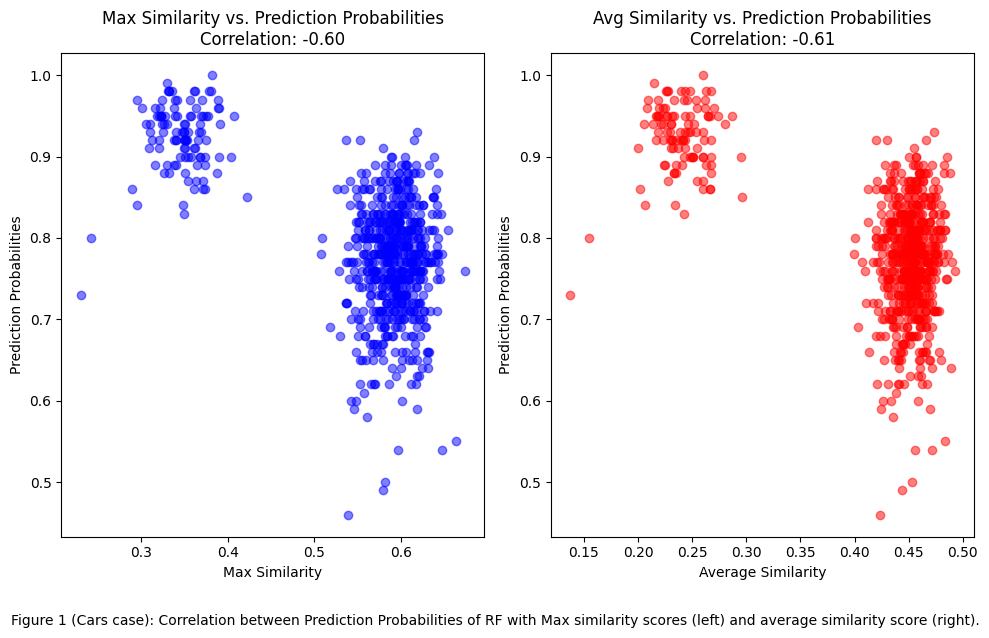

In [23]:

max_similarities_car = np.array(max_similarities_car)
avg_similarities_car = np.array(avg_similarities_car)
prediction_probabilities_car = np.array(probabilities_car)

pearson_corr, _ = pearsonr(prediction_probabilities_car, max_similarities_car)               #Pearson's corr.coefficent
print(f"Pearson's correlation coefficient (max similarities vs prediction probabilities): {pearson_corr}")

spearman_corr, _ = spearmanr(prediction_probabilities_car, max_similarities_car)              #Spearman's corr.coefficent
print(f"Spearman's correlation coefficient (max similarities vs prediction probabilities): {spearman_corr}")

pearson_corr2, _ = pearsonr(prediction_probabilities_car, avg_similarities_car)
print(f"Pearson's correlation coefficient (max similarities vs prediction probabilities): {pearson_corr}")

spearman_corr2, _ = spearmanr(prediction_probabilities_car, avg_similarities_car)
print(f"Spearman's correlation coefficient (max similarities vs prediction probabilities): {spearman_corr}")

correlation_max = np.corrcoef(max_similarities_car, prediction_probabilities_car.squeeze())[0, 1]
correlation_avg = np.corrcoef(avg_similarities_car, prediction_probabilities_car.squeeze())[0, 1]


plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.scatter(max_similarities_car, prediction_probabilities_car.squeeze(), color='blue', alpha=0.5)
plt.title(f"Max Similarity vs. Prediction Probabilities\nCorrelation: {correlation_max:.2f}")
plt.xlabel('Max Similarity')
plt.ylabel('Prediction Probabilities')


plt.subplot(122)
plt.scatter(avg_similarities_car, prediction_probabilities_car.squeeze(), color='red', alpha=0.5)
plt.title(f"Avg Similarity vs. Prediction Probabilities\nCorrelation: {correlation_avg:.2f}")
plt.xlabel('Average Similarity')
plt.ylabel('Prediction Probabilities')
txt="Figure 1 (Cars case): Correlation between Prediction Probabilities of RF with Max similarity scores (left) and average similarity score (right)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()


Pearson's correlation coefficient: -0.5834918289755967
Spearman's correlation coefficient: -0.36223223863248905


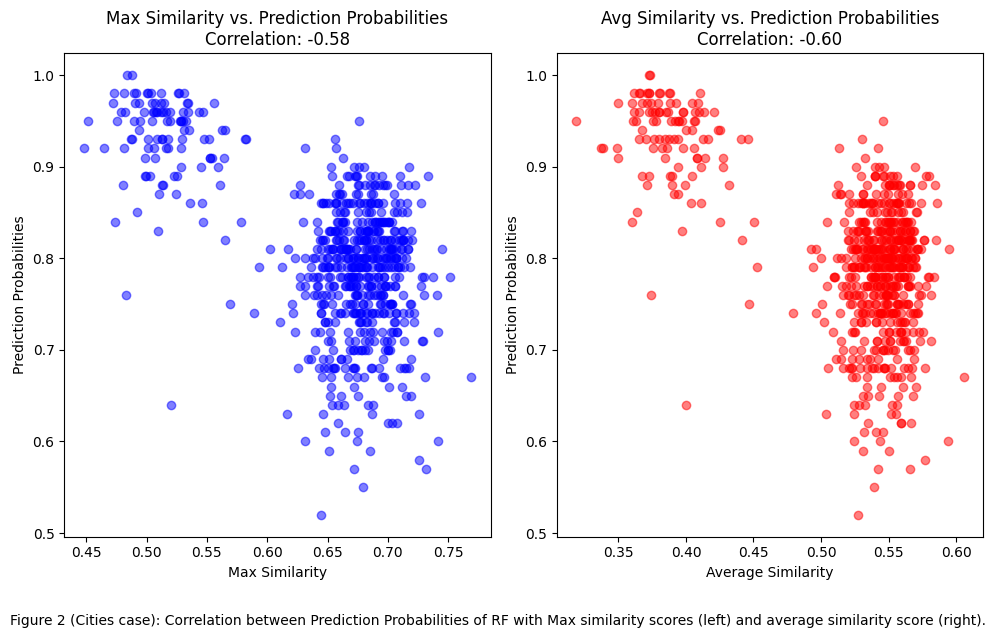

In [24]:
max_similarities_city = np.array(max_similarities_city)
avg_similarities_city = np.array(avg_similarities_city)
prediction_probabilities_city = np.array(probabilities_city)

pearson_corr, _ = pearsonr(prediction_probabilities_city, max_similarities_city)
print(f"Pearson's correlation coefficient: {pearson_corr}")

spearman_corr, _ = spearmanr(prediction_probabilities_city, max_similarities_city)
print(f"Spearman's correlation coefficient: {spearman_corr}")


correlation_max = np.corrcoef(max_similarities_city, prediction_probabilities_city.squeeze())[0, 1]
correlation_avg = np.corrcoef(avg_similarities_city, prediction_probabilities_city.squeeze())[0, 1]


plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.scatter(max_similarities_city, prediction_probabilities_city.squeeze(), color='blue', alpha=0.5)
plt.title(f"Max Similarity vs. Prediction Probabilities\nCorrelation: {correlation_max:.2f}")
plt.xlabel('Max Similarity')
plt.ylabel('Prediction Probabilities')


plt.subplot(122)
plt.scatter(avg_similarities_city, prediction_probabilities_city.squeeze(), color='red', alpha=0.5)
plt.title(f"Avg Similarity vs. Prediction Probabilities\nCorrelation: {correlation_avg:.2f}")
plt.xlabel('Average Similarity')
plt.ylabel('Prediction Probabilities')
txt="Figure 2 (Cities case): Correlation between Prediction Probabilities of RF with Max similarity scores (left) and average similarity score (right)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

In [77]:
print(max_similarities_car)

[0.60619194 0.60464417 0.61711118 0.62019804 0.50847007 0.60606489
 0.60152523 0.55394951 0.60278179 0.54998955 0.60689935 0.62339883
 0.58193758 0.57503211 0.58266249 0.590481   0.60818787 0.56459519
 0.62188068 0.59912556 0.55259853 0.59579709 0.61707541 0.54808703
 0.59771228 0.5816864  0.63207897 0.59164598 0.60365457 0.59089268
 0.56613666 0.58409887 0.59344122 0.598156   0.57651036 0.54749779
 0.53628938 0.59490125 0.56474402 0.6290727  0.57571273 0.58902291
 0.59727995 0.57616035 0.59566138 0.58422971 0.61932405 0.64309916
 0.5941948  0.59133404 0.61365054 0.67423909 0.6174803  0.56846548
 0.55807672 0.64090934 0.58238416 0.53750927 0.57316109 0.61941782
 0.57727843 0.62019523 0.59747078 0.54166439 0.61078273 0.60490446
 0.57305985 0.58406916 0.60960108 0.61301747 0.62180256 0.5891256
 0.55753765 0.58185099 0.58954792 0.58869271 0.58783858 0.57389899
 0.64059973 0.58347628 0.59654441 0.62240163 0.61860849 0.57137723
 0.56768828 0.63018983 0.53681101 0.58820063 0.55715979 0.55962

In [78]:
np.max(max_similarities_car)

0.6742390896245002

In [79]:
np.max(max_similarities_city)

0.7689780260789093

5. Based on your study so far, decide which generated texts should be discarded in order to improve the benchmark and yield a more robust classifier.

In [62]:
#Cars: Let's try to discard the elements that have prediction probabilities < 0.6

indexes_to_remove = []
threshold = 0.6  # Threshold for removing elements

for i in range(len(prediction_probabilities_city)):
    if prediction_probabilities_city[i] < threshold:               #remove if pred_prob < threshold
        indexes_to_remove.append(i)                                    

# Remove elements from augmented_data1
augmented_data0 = augmented_data0.drop(augmented_data0.index[indexes_to_remove])

# Remove elements from prediction_probabilities_city, max_similarities_city, and avg_similarities_city
prediction_probabilities_city = [prob for idx, prob in enumerate(prediction_probabilities_city) if idx not in indexes_to_remove]
max_similarities_city = [sim for idx, sim in enumerate(max_similarities_city) if idx not in indexes_to_remove]
avg_similarities_city = [avg_sim for idx, avg_sim in enumerate(avg_similarities_city) if idx not in indexes_to_remove]

aug_train, aug_test = train_test_split(augmented_data0, test_size=0.2, random_state=2023)

vectorizer = TfidfVectorizer()
vectorizer.fit(aug_train.sent.values)

X = vectorizer.transform(aug_train.sent.values)
y = aug_train.generated.values
    

rf = RandomForestClassifier()
rf.fit(X, y)
predictions_rf = rf.predict(vectorizer.transform(aug_test.sent.values))
print("Random Forest")
report = classification_report(aug_test.generated, 
                            predictions_rf,
                            zero_division=0)
print(report)
    
f1_score_line = report.split('\n')[-2]  # F1-score line is usually the second last line
f1_score = float(f1_score_line.split()[-2]) 
print("F1 score: ", f1_score)
print('\n')



Random Forest
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3604
           1       0.84      0.88      0.86      3626

    accuracy                           0.85      7230
   macro avg       0.86      0.85      0.85      7230
weighted avg       0.86      0.85      0.85      7230

F1 score:  0.85




After discarding the elements that prediction probabilities <0.6, we got a slightly worse result than before. This is because the certainty of the classifier was, for most cases, bigger than 0.5, which should still contribute to the accuracy of our classifier.

In [25]:
#Cities: Let's try to discard the elements that have prediction probabilities < 0.6

indexes_to_remove = []
threshold = 0.6  # Threshold for removing elements

for i in range(len(prediction_probabilities_city)):
    if prediction_probabilities_city[i] < threshold:               #remove if pred_prob < threshold
        indexes_to_remove.append(i)                                    

# Remove elements from augmented_data1
augmented_data1 = augmented_data1.drop(augmented_data1.index[indexes_to_remove])

# Remove elements from prediction_probabilities_city, max_similarities_city, and avg_similarities_city
prediction_probabilities_city = [prob for idx, prob in enumerate(prediction_probabilities_city) if idx not in indexes_to_remove]
max_similarities_city = [sim for idx, sim in enumerate(max_similarities_city) if idx not in indexes_to_remove]
avg_similarities_city = [avg_sim for idx, avg_sim in enumerate(avg_similarities_city) if idx not in indexes_to_remove]

aug_train, aug_test = train_test_split(augmented_data1, test_size=0.2, random_state=2023)

vectorizer = TfidfVectorizer()
vectorizer.fit(aug_train.sent.values)

X = vectorizer.transform(aug_train.sent.values)
y = aug_train.generated.values
    

rf = RandomForestClassifier()
rf.fit(X, y)
predictions_rf = rf.predict(vectorizer.transform(aug_test.sent.values))
print("Random Forest")
report = classification_report(aug_test.generated, 
                            predictions_rf,
                            zero_division=0)
print(report)
    
f1_score_line = report.split('\n')[-2]  # F1-score line is usually the second last line
f1_score = float(f1_score_line.split()[-2]) 
print("F1 score: ", f1_score)
print('\n')


Random Forest
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      3329
           1       0.83      0.95      0.88      3402

    accuracy                           0.87      6731
   macro avg       0.88      0.87      0.87      6731
weighted avg       0.88      0.87      0.87      6731

F1 score:  0.87




If we compare this with the initial benchmarking result, we see that the F1 score is not affected by this discard. (not very strange, since only 8 essays were removed).

<font size="5">B. Learning Curves</font>

1. Keep a test set apart and split the train data to portions (10%, …, 90%, 100%). 
2. Train your best performing algorithm on each portion.
3. Assess each trained instance on the test (the same across portions) and on the training data.
4. Visualise the two curves (train, test), based on an appropriate evaluation measure, diagnosing weak and strong points of your classifier (a.k.a. the learning curves).

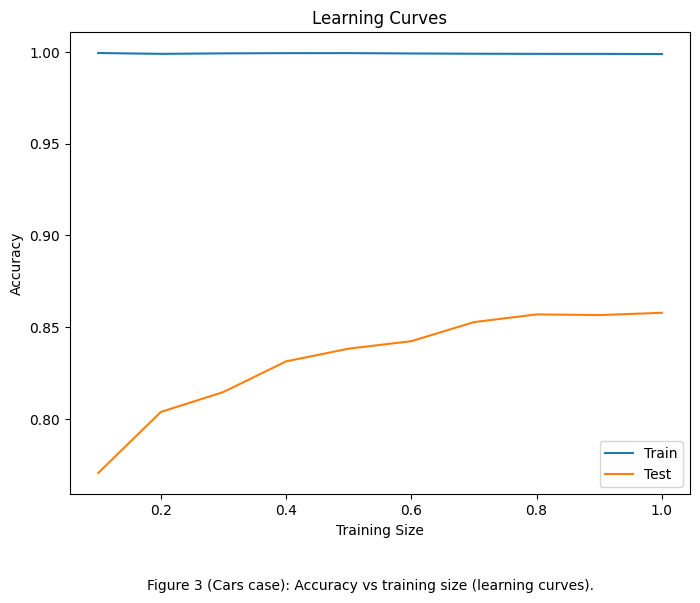

In [26]:
#cars (Learning curves)

train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_accuracies = []
test_accuracies = []

regressor = RandomForestRegressor()

for size in train_sizes:
    
    train_subset = aug_train_car.sample(frac=size, random_state=2023)    #use a portion of the training data
    X_train_subset = vectorizer.transform(train_subset.sent.values)
    y_train_subset = train_subset.generated.values
    
    rf_subset = RandomForestClassifier()                
    rf_subset.fit(X_train_subset, y_train_subset)             #train the best performing algorithm (Random Forest) on each portion
    
   
    train_predictions = rf_subset.predict(X_train_subset)                     
    train_accuracy = accuracy_score(y_train_subset, train_predictions)          #evaluate on the training set
    train_accuracies.append(train_accuracy)
    
   
    test_predictions = rf_subset.predict(vectorizer.transform(aug_test_car.sent.values)) 
    test_accuracy = accuracy_score(aug_test_car.generated, test_predictions)            #evaluate on the fixed test set
    test_accuracies.append(test_accuracy)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracies, label='Train')
plt.plot(train_sizes, test_accuracies, label='Test')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
txt="Figure 3 (Cars case): Accuracy vs training size (learning curves)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.legend()
plt.show()

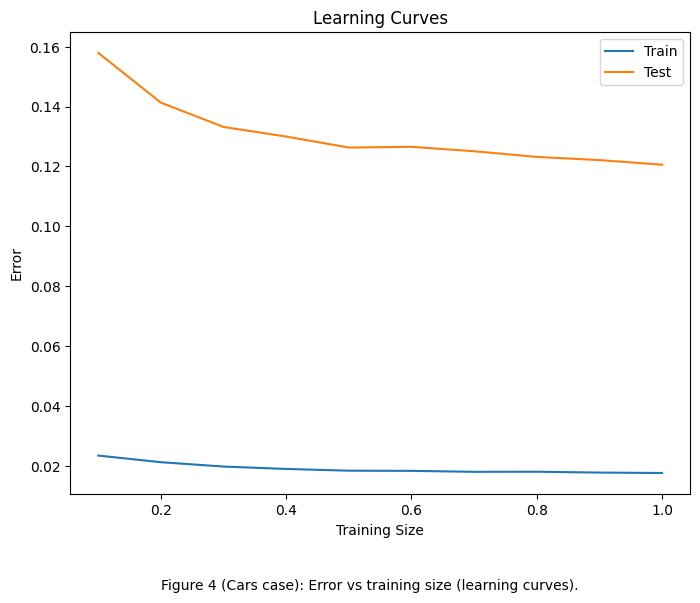

In [27]:
#(Cars) An alternative: Let's plot the learning curves with respect to the MSE
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_errors = []
test_errors = []



for size in train_sizes:
    train_subset = aug_train_car.sample(frac=size, random_state=2023)
    X_train_subset = vectorizer.transform(train_subset.sent.values)
    y_train_subset = train_subset.generated.values
    
    rf_subset = RandomForestRegressor()
    rf_subset.fit(X_train_subset, y_train_subset)
    
    train_predictions = rf_subset.predict(X_train_subset)
    train_error = mean_squared_error(y_train_subset, train_predictions)
    train_errors.append(train_error)
    
    test_predictions = rf_subset.predict(vectorizer.transform(aug_test_car.sent.values))
    test_error = mean_squared_error(aug_test_car.generated, test_predictions)
    test_errors.append(test_error)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label='Train')
plt.plot(train_sizes, test_errors, label='Test')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.title('Learning Curves')
txt="Figure 4 (Cars case): Error vs training size (learning curves)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.legend()
plt.show()


In [66]:
print(test_accuracies)

[0.8060117302052786, 0.8250733137829912, 0.839149560117302, 0.8480938416422288, 0.8529325513196481, 0.8577712609970675, 0.8651026392961877, 0.8665689149560117, 0.8734604105571847, 0.8731671554252199]


5. Add a regressor to the plot, to estimate how many more texts should you generate to reach the "best" performance.  

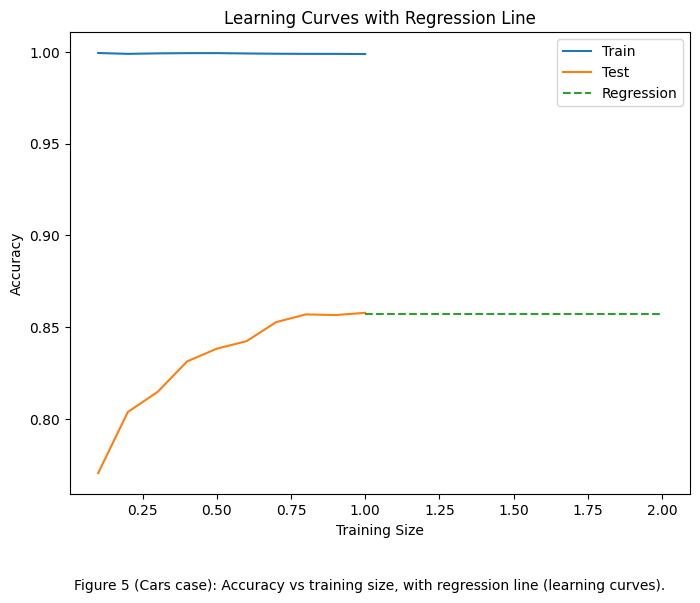

In [28]:
# (Cars) And now let's fit a regression line

train_sizes_np = np.array(train_sizes).reshape(-1, 1)
regressor.fit(train_sizes_np, test_accuracies)  #fitting on test accuracies for prediction

additional_sizes = np.linspace(1.0, 2.0, 100).reshape(-1, 1)  #generate additional sizes for prediction
predicted_accuracies = regressor.predict(additional_sizes)    #predict for additional training sizes 


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracies, label='Train')
plt.plot(train_sizes, test_accuracies, label='Test')
plt.plot(additional_sizes, predicted_accuracies, label='Regression', linestyle='--')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves with Regression Line')
txt="Figure 5 (Cars case): Accuracy vs training size, with regression line (learning curves)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.legend()
plt.show()


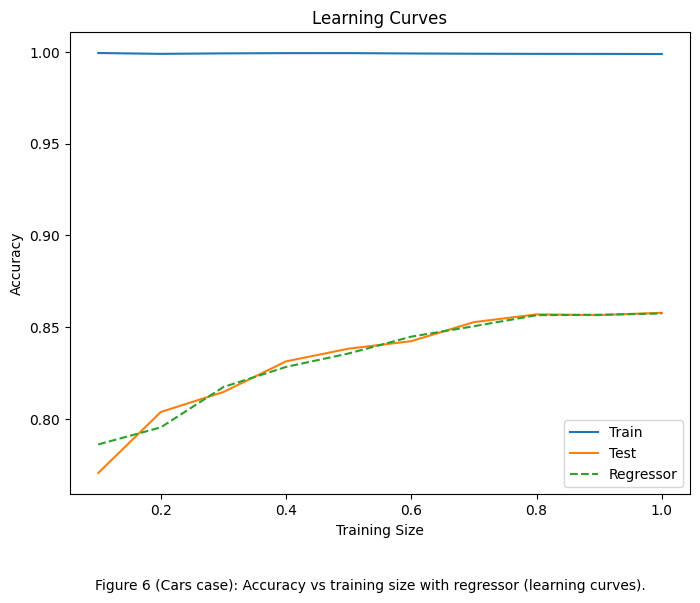

In [29]:
regressor = RandomForestRegressor()
'''
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_accuracies = []
test_accuracies = []

regressor = RandomForestRegressor()

for size in train_sizes:
  
    train_subset = aug_train_car.sample(frac=size, random_state=2023)
    X_train_subset = vectorizer.transform(train_subset.sent.values)
    y_train_subset = train_subset.generated.values
    
   
    rf_subset = RandomForestClassifier()
    rf_subset.fit(X_train_subset, y_train_subset)
    
   
    train_predictions = rf_subset.predict(X_train_subset)
    train_accuracy = accuracy_score(y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)
    
    
    test_predictions = rf_subset.predict(vectorizer.transform(aug_test_car.sent.values))
    test_accuracy = accuracy_score(aug_test_car.generated, test_predictions)
    test_accuracies.append(test_accuracy)
'''

regressor.fit(np.array(train_sizes).reshape(-1, 1), test_accuracies)     #fit a regression model


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracies, label='Train')
plt.plot(train_sizes, test_accuracies, label='Test')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()


plt.plot(train_sizes, regressor.predict(np.array(train_sizes).reshape(-1, 1)), label='Regressor', linestyle='--')  #plot regression line 
plt.legend()
txt="Figure 6 (Cars case): Accuracy vs training size with regressor (learning curves)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()


After examining the above learning rates, we figure out the following:

1) Our classifier gives accuracy 1 (perfect) for the training data for each portion. The test dataset accuracy increments as the training size gets bigger. In most cases, this would be a concern of overfitting, but in our case, it means that our classifier has learned perfectly from the data we trained it to and thinking that it has already been trained on these ones that it is being tested, the accuracy rates are not a very big surprise. Of course, the bigger the training size, the better accuracy on the test data, which are most of our interest.
2) Correspondingly, the error rate is very small for the training data but it even diminishes as the size increments. The same thing happens for the test data, which is perfectly sensible.
3) The regressor shows that the model captures the best accuracy between the current training sizes (0,1), as in sizes up to 2 (200% training size), no further improvements occur.

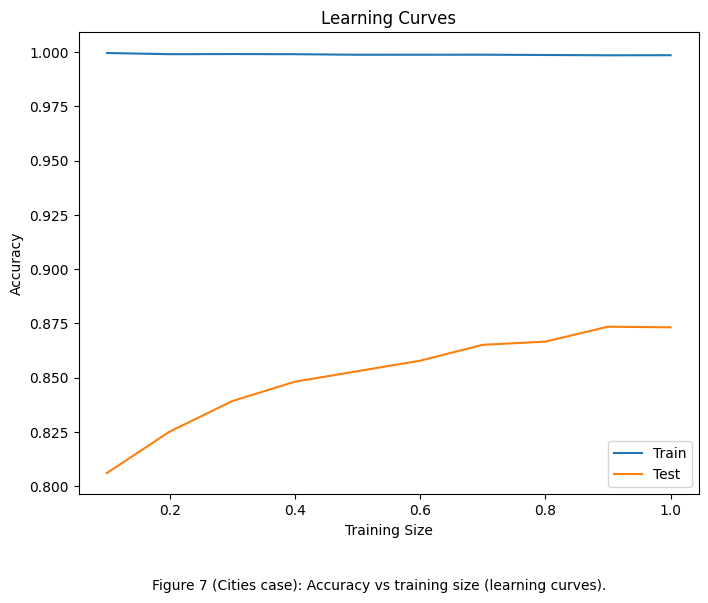

In [30]:
#cities (Learning curves)

train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_accuracies = []
test_accuracies = []


for size in train_sizes:
    
    train_subset = aug_train_city.sample(frac=size, random_state=2023)
    X_train_subset = vectorizer.transform(train_subset.sent.values)
    y_train_subset = train_subset.generated.values
    
    
    rf_subset = RandomForestClassifier()
    rf_subset.fit(X_train_subset, y_train_subset)
    
    
    train_predictions = rf_subset.predict(X_train_subset)
    train_accuracy = accuracy_score(y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)
    
   
    test_predictions = rf_subset.predict(vectorizer.transform(aug_test_city.sent.values))
    test_accuracy = accuracy_score(aug_test_city.generated, test_predictions)
    test_accuracies.append(test_accuracy)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracies, label='Train')
plt.plot(train_sizes, test_accuracies, label='Test')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
txt="Figure 7 (Cities case): Accuracy vs training size (learning curves)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.legend()
plt.show()

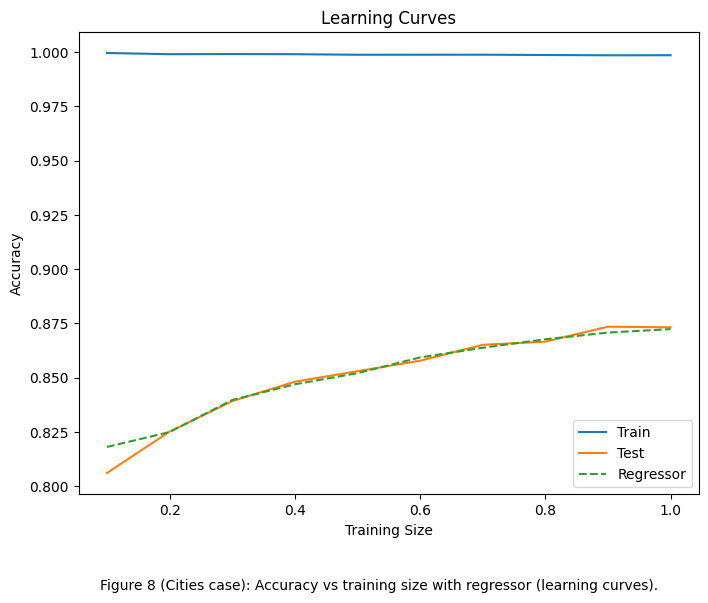

In [31]:
#cities: 

regressor = RandomForestRegressor()

regressor.fit(np.array(train_sizes).reshape(-1, 1), test_accuracies)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracies, label='Train')
plt.plot(train_sizes, test_accuracies, label='Test')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()


plt.plot(train_sizes, regressor.predict(np.array(train_sizes).reshape(-1, 1)), label='Regressor', linestyle='--')
plt.legend()
txt="Figure 8 (Cities case): Accuracy vs training size with regressor (learning curves)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

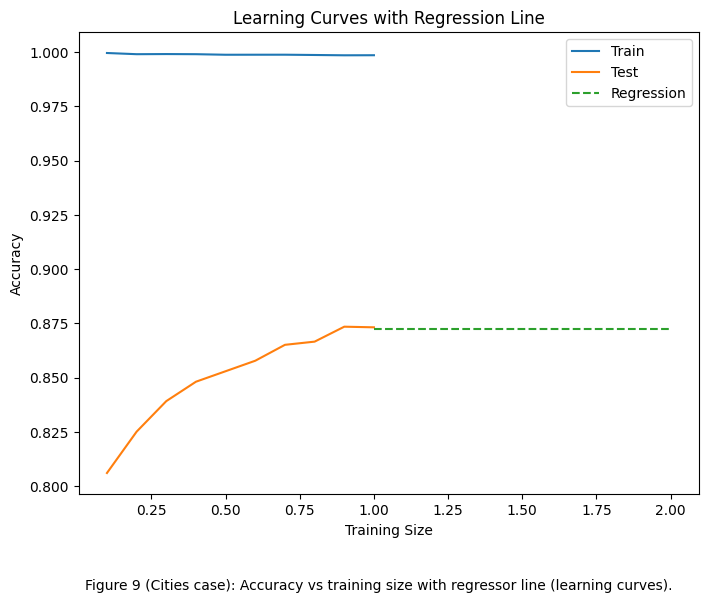

In [32]:
# Cities: fitting a regression line

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_sizes_np = np.array(train_sizes).reshape(-1, 1)
regressor.fit(train_sizes_np, test_accuracies)  


additional_sizes = np.linspace(1.0, 2.0, 100).reshape(-1, 1)  
predicted_accuracies = regressor.predict(additional_sizes)

# Plot learning curves and the regression line
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracies, label='Train')
plt.plot(train_sizes, test_accuracies, label='Test')
plt.plot(additional_sizes, predicted_accuracies, label='Regression', linestyle='--')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves with Regression Line')
txt="Figure 9 (Cities case): Accuracy vs training size with regressor line (learning curves)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.legend()
plt.show()

<font size="5">C. Clustering - based augmentation</font>

1. Use K-Means, based on an approprate text representation and the (estimated) optimum K, to cluster the generated essays, and then the student essays.

A. Cars

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

all_essays = augmented_data0['text'].values                      #combine all essays
cleaned_essays = ['' if isinstance(x, float) and np.isnan(x) else x for x in all_essays]
tfidf_vectorizer = TfidfVectorizer(max_features=1000)                #Initialize a text representation (via Tfidf)

tfidf_features = tfidf_vectorizer.fit_transform(cleaned_essays)         #fit & transform


C:\Users\Drogias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


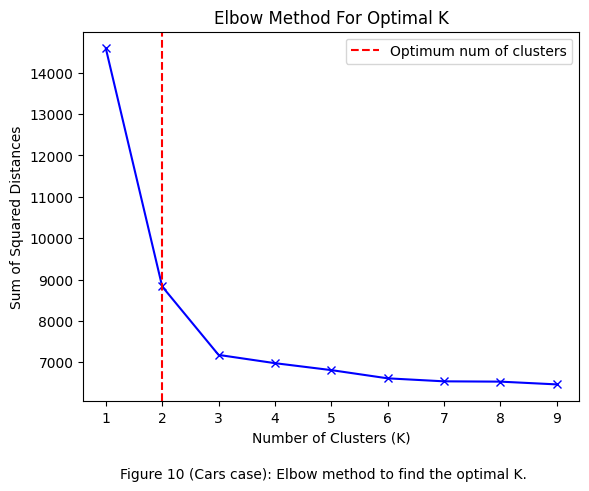

In [34]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []                        #sum of squared distances of samples 
K = range(1, 10)  

for k in K:
    kmeans = KMeans(n_clusters=k, max_iter = 1000)
    kmeans = kmeans.fit(tfidf_features)
    sum_of_squared_distances.append(kmeans.inertia_)             # intertia_ gives the sum of squares distances of samples to the closest cluster center


plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal K')
plt.axvline(x=2, color='red', linestyle='--', label='Optimum num of clusters')  
txt="Figure 10 (Cars case): Elbow method to find the optimal K."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.legend()  
plt.show()


In [46]:
print(kmeans.labels_)                                   #cluster labels assigned to each data point after fitting the K-means

[1 1 1 ... 0 0 0]


In [35]:
optimal_K = 2

kmeans = KMeans(n_clusters=optimal_K, n_init='auto')
kmeans.fit(tfidf_features)


augmented_data0['cluster'] = kmeans.labels_              # assign clusters to the data


LLM_essays = augmented_data0[augmented_data0['generated'] == 1]                   #separate generated essays and student essays based on the 'generated' column
student_essays = augmented_data0[augmented_data0['generated'] == 0]


LLM_essays_by_cluster = LLM_essays.groupby('cluster')                  #grouping LLM essays by cluster


student_essays_by_cluster = student_essays.groupby('cluster')          #grouping student essays by cluster





In [36]:
for cluster_label, cluster_data in LLM_essays_by_cluster:
    print(f"Cluster {cluster_label}:")
    print(cluster_data)

Cluster 1:
      id  prompt_id text  generated  \
0    NaN        NaN  NaN          1   
0    NaN        NaN  NaN          1   
0    NaN        NaN  NaN          1   
0    NaN        NaN  NaN          1   
0    NaN        NaN  NaN          1   
..   ...        ...  ...        ...   
706  NaN        NaN  NaN          1   
706  NaN        NaN  NaN          1   
706  NaN        NaN  NaN          1   
706  NaN        NaN  NaN          1   
706  NaN        NaN  NaN          1   

                                                  sent  \
0                              Cars emit the the fuel.   
0    famout Cars given on to sports cars ultiplying...   
0    They have been planet Earth and not be able tr...   
0    From that, " Presidents lives in a paris expen...   
0              Paris have most pay for to the comes. "   
..                                                 ...   
706  Governments must invest in robust public trans...   
706  Community engagement and awareness campaigns a...  

In [37]:
for cluster_label, cluster_data in student_essays_by_cluster:
    print(f"Cluster {cluster_label}:")
    print(cluster_data)

Cluster 0:
           id  prompt_id                                               text  \
0    0059830c        0.0  Cars. Cars have been around since they became ...   
0    0059830c        0.0  Cars. Cars have been around since they became ...   
0    0059830c        0.0  Cars. Cars have been around since they became ...   
0    0059830c        0.0  Cars. Cars have been around since they became ...   
0    0059830c        0.0  Cars. Cars have been around since they became ...   
..        ...        ...                                                ...   
729  85a5c9c2        0.0  The culture of the cars is a easier way of tra...   
729  85a5c9c2        0.0  The culture of the cars is a easier way of tra...   
729  85a5c9c2        0.0  The culture of the cars is a easier way of tra...   
729  85a5c9c2        0.0  The culture of the cars is a easier way of tra...   
729  85a5c9c2        0.0  The culture of the cars is a easier way of tra...   

     generated                          

2. Compare the cluster balance (number of instances per cluster) between the two clusterings.

In [38]:
LLM_cluster_counts = LLM_essays['cluster'].value_counts().sort_index()          # num of instances in LLM essays

student_cluster_counts = student_essays['cluster'].value_counts().sort_index()  # num of instances in student essays
 
print("Cluster counts for LLM_essays:")
print(LLM_cluster_counts)

print("\nCluster counts for student_essays:")
print(student_cluster_counts)


Cluster counts for LLM_essays:
cluster
1    20213
Name: count, dtype: int64

Cluster counts for student_essays:
cluster
0    19722
1      491
Name: count, dtype: int64


We observe that even though we asked for two clusters, in the LLM case, only one was generated. This indicates that the data are not in the best of form to be adequate for clustering. Various reasons can be for that, e.g. poor initial centroids, the data being arranged in a way that it appears as a single cluster according to the algorithm's criteria etc. Perhaps also it is Kmeans not being the appropriate solution for our clustering case. Also, for the student essays, even though two clusters were formed, there is huge imbalance between their sizes, which actually makes us question the significance of this clustering.

3. Yield a title per cluster, reflecting the topic of the texts included.

Here, we will use the FreqDist function to find the most frequent words in each cluster.

In [39]:
def generate_titles(data, num_of_words):
    titles = {}
    for label, essay_data in data.groupby('cluster'):
        text_combined = ' '.join(essay_data['sent'])                    #combine the text within the cluster
        text_combined = re.sub(r'[.,`?""]', '', text_combined)             #Remove elements(dots, commas etc.) using regular expressions
        words = word_tokenize(text_combined.lower())
        stop_words = set(stopwords.words('english'))                    #find the stop-words
        filtered_words = [word for word in words if word not in stop_words]   #keep only the non stop-words
        freq = FreqDist(filtered_words) 
        most_common = freq.most_common(num_of_words)                          #Find the most frequent words
        
        title = ' '.join(word[0] for word in most_common)                   #title consists of the N most frequent words
        titles[label] = title
        return titles

In [40]:
titles_LLM_by_cluster = {}
for label, group in LLM_essays_by_cluster:
    titles_for_cluster = generate_titles(group, num_of_words=5)           #give titles for every LLM cluster
    titles_LLM_by_cluster[label] = titles_for_cluster


titles_students_by_cluster = {}
for label, group in student_essays_by_cluster:
    titles_for_cluster = generate_titles(group, num_of_words=5)           #give titles for every student cluster
    titles_students_by_cluster[label] = titles_for_cluster


In [41]:
print(titles_LLM_by_cluster)

{1: {1: 'car cars people usage limiting'}}


In [42]:
print(titles_students_by_cluster)

{0: {0: 'electoral people car cars college'}, 1: {1: 'thee college electoral people theat'}}


4. Study the similarities between the two clusterings, by finding clusters comprising similar texts.

In [43]:
#Similarities between clusterings. Here, we will be using cosine similarity

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

LLM_cluster_docs = [' '.join(group['LLM essay - Cars']) for cluster_id, group in LLM_essays_by_cluster]    #join LLM essays in each cluster
student_cluster_docs = [' '.join(group['text']) for cluster_id, group in student_essays_by_cluster]

tfidf_vectorizer = TfidfVectorizer()
LLM_tfidf = tfidf_vectorizer.fit_transform(LLM_cluster_docs)
student_tfidf = tfidf_vectorizer.transform(student_cluster_docs)

threshold = 0.7
similar_clusters = []
for idx, LLM_cluster in enumerate(LLM_tfidf):
    similarities = cosine_similarity(LLM_cluster, student_tfidf)            #cosine similarities between clusters
    most_similar_cluster_idx = similarities.argmax()
    similarity_score = similarities[0, most_similar_cluster_idx]

    
    if similarity_score > threshold: 
        similar_clusters.append((idx, most_similar_cluster_idx, similarity_score))

if similar_clusters:
    print("Clusters with similar texts:")                             #Printing similar clusters and their similarity scores
    for LLM_idx, student_idx, similarity in similar_clusters:
        print(f"LLM Cluster {LLM_idx} is similar to Student Cluster {student_idx} with similarity score {similarity}")
else:
    print("No similar clusters found.")



Clusters with similar texts:
LLM Cluster 0 is similar to Student Cluster 0 with similarity score 0.9658230911313356


5. Generate more texts (as in A) in order to better balance your clusters.

In [44]:
max_count = LLM_cluster_counts.max()
average_count = LLM_cluster_counts.mean()

#iterate through clusters to identify and generate data for underrepresented clusters
for cluster, count in LLM_cluster_counts.items():
    if count < max_count:
        difference = max_count - count
        
        generated_text = lm_cars.generate_text(int(difference))     # generate text to fill the gap
        
        for i in range (difference):
            
            generated_df = pd.DataFrame({     #make a dataframe
            'sent': [generated_text],  # Repeat the text for each sentence
            'generated': 1,  
            'cluster': cluster  
            })
            
            augmented_data0 = pd.concat([augmented_data0, generated_df], ignore_index=True) #and append the dataframe to the data                

In [45]:
# Separate generated essays and student essays based on the 'generated' column
LLM_essays = augmented_data0[augmented_data0['generated'] == 1]
student_essays = augmented_data0[augmented_data0['generated'] == 0]

LLM_essays_by_cluster = LLM_essays.groupby('cluster')

student_essays_by_cluster = student_essays.groupby('cluster')

In [46]:
LLM_cluster_counts = LLM_essays['cluster'].value_counts().sort_index()          # num of instances in LLM essays

student_cluster_counts = student_essays['cluster'].value_counts().sort_index()  # num of instances in LLM essays
 
print("Cluster counts for LLM_essays:")
print(LLM_cluster_counts)

print("\nCluster counts for student_essays:")
print(student_cluster_counts)

Cluster counts for LLM_essays:
cluster
1    20213
Name: count, dtype: int64

Cluster counts for student_essays:
cluster
0    19722
1      491
Name: count, dtype: int64


In [47]:
augmented_data0

,id,prompt_id,text,generated,sent,LLM essay - Cars,cluster
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars.,NaN,0
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have been around since they became famous...,NaN,0
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have played a major role in our every day...,NaN,0
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,"But now, people are starting to question if li...",NaN,0
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,"To me, limiting the use of cars might be a goo...",NaN,0
...,...,...,...,...,...,...,...
706,NaN,NaN,NaN,1,Governments must invest in robust public trans...,"In the modern era, automobiles have become an ...",1
706,NaN,NaN,NaN,1,Community engagement and awareness campaigns a...,"In the modern era, automobiles have become an ...",1
706,NaN,NaN,NaN,1,"In conclusion, limiting car usage holds immens...","In the modern era, automobiles have become an ...",1
706,NaN,NaN,NaN,1,By adopting a multi-faceted approach that prio...,"In the modern era, automobiles have become an ...",1


6. Re-train your best-performant classifier on the new data (or a careful selection of them) and analyze the benefits of using clustering to improve the classifier. 
 

In [48]:
#Run our best classifier on the new data

aug_train_car, aug_test_car = train_test_split(augmented_data0, test_size=0.2, random_state=2023)

vectorizer = TfidfVectorizer()
vectorizer.fit(aug_train_car.sent.values)


X = vectorizer.transform(aug_train_car.sent.values)
y= aug_train_car.generated.values
rf = RandomForestClassifier()
rf.fit(X, y)
predictions_rf = rf.predict(vectorizer.transform(aug_test_car.sent.values))
print("Random Forest")
print(classification_report(aug_test_car.generated, 
                            predictions_rf,
                            zero_division=0))
print('\n')

rf_cv_scores = cross_val_score(rf, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Random Forest):", rf_cv_scores)
print("Mean CV accuracy (Random Forest):", rf_cv_scores.mean())




Random Forest
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      4014
           1       0.84      0.90      0.87      4072

    accuracy                           0.86      8086
   macro avg       0.86      0.86      0.86      8086
weighted avg       0.86      0.86      0.86      8086



Cross-validation scores (Random Forest): [0.86054422 0.84910328 0.85497835 0.86394558 0.85528757 0.84941249
 0.85095857 0.86487322 0.85559678 0.85034014]
Mean CV accuracy (Random Forest): 0.8555040197897341


In our case, we saw that clustering the whole essays did not provide the expected results. But in general, some points where clustering aids our classifier are:

1) **Feature Extraction**: Clustering can help identify relevant features or dimensions within the data. By grouping similar data points together, it can highlight key attributes that might be more discriminative for our classification task and thus use these features to improve the performance of our classifer.

2) **Data Preprocessing**: Clustering can aid in data preprocessing by segmenting the dataset into clusters. This can help in handling outliers, noise, or irrelevant data points, allowing the classifier to focus on more relevant and structured subsets of the data.

3) **Dimensionality Reduction**: Clustering can be employed for dimensionality reduction by clustering similar features. This process can effectively reduce the complexity of the data, making it more manageable and improving the classifier's performance by reducing overfitting.

4) **Semi-Supervised Learning**: By grouping similar instances together, clustering algorithms can assign labels to clusters, and these labels can be utilized to semi-supervise the classifier, improving its performance.

5) **Improved Class Separation**: Clustering helps in identifying natural clusters within data. This information can be used to modify or augment the feature space, leading to better separation between classes and improving the classifier's ability to discriminate between different classes.

In the next example, when clustering the cities case, we will apply clustering to sentences to see if our clustering gets any better.

B. Cities

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

all_essays = augmented_data1['sent'].values                          #combine all essays
cleaned_essays = ['' if isinstance(x, float) and np.isnan(x) else x for x in all_essays]
tfidf_vectorizer = TfidfVectorizer(max_features=1000)                #Initialize a text representation (via Tfidf)

tfidf_features = tfidf_vectorizer.fit_transform(cleaned_essays)         #fit & transform

C:\Users\Drogias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


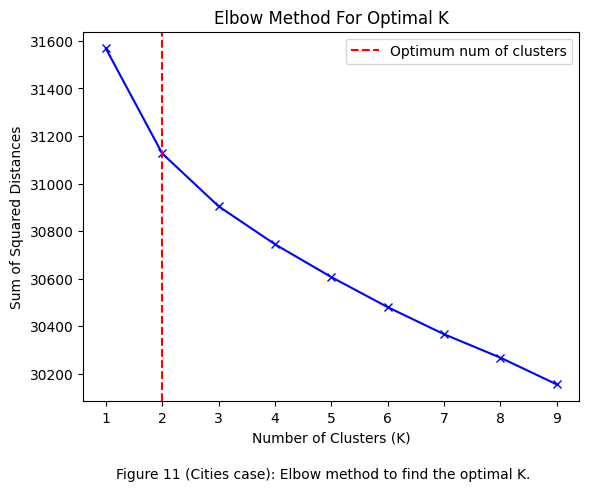

In [50]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []                        #sum of squared distances of samples 
K = range(1, 10)  

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(tfidf_features)
    sum_of_squared_distances.append(kmeans.inertia_)             #intertia_ gives the sum of squares distances of samples to the closest cluster center


plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal K')
plt.axvline(x=2, color='red', linestyle='--', label='Optimum num of clusters')  # Adjust linestyle and color as needed
plt.legend() 
txt="Figure 11 (Cities case): Elbow method to find the optimal K."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()


In [51]:
optimal_K = 2

kmeans = KMeans(n_clusters=optimal_K, n_init='auto')
kmeans.fit(tfidf_features)

# Assign clusters to the data
augmented_data1['cluster'] = kmeans.labels_

# Separate generated essays and student essays based on the 'generated' column
LLM_essays = augmented_data1[augmented_data1['generated'] == 1]
student_essays = augmented_data1[augmented_data1['generated'] == 0]

# Group LLM_essays by cluster
LLM_essays_by_cluster = LLM_essays.groupby('cluster')

# Group student_essays by cluster
student_essays_by_cluster = student_essays.groupby('cluster')


In [52]:
LLM_cluster_counts = LLM_essays['cluster'].value_counts().sort_index()          # num of instances in LLM essays

student_cluster_counts = student_essays['cluster'].value_counts().sort_index()  # num of instances in LLM essays
 
print("Cluster counts for LLM_essays:")
print(LLM_cluster_counts)

print("\nCluster counts for student_essays:")
print(student_cluster_counts)


Cluster counts for LLM_essays:
cluster
0    8496
1    8363
Name: count, dtype: int64

Cluster counts for student_essays:
cluster
0    12807
1     3987
Name: count, dtype: int64


Here the clustering was much better! We got 2 clusters for the LLMs and they were almost balanced! The student essays, though, formed two uneven clusters.

In [53]:
titles_LLM_by_cluster = {}
for label, group in LLM_essays_by_cluster:
    titles_for_cluster = generate_titles(group, num_of_words=5)
    titles_LLM_by_cluster[label] = titles_for_cluster


titles_students_by_cluster = {}
for label, group in student_essays_by_cluster:
    titles_for_cluster = generate_titles(group, num_of_words=5)
    titles_students_by_cluster[label] = titles_for_cluster

In [54]:
print(titles_LLM_by_cluster)

{0: {0: 'vote states people votes would'}, 1: {1: 'electoral college vote states popular'}}


In [55]:
print(titles_students_by_cluster)

{0: {0: 'car cars people would usage'}, 1: {1: 'electoral college vote president people'}}


In [56]:
#Similarities between clusterings. Here, we will be using cosine similarity

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


LLM_cluster_docs = [' '.join(group['LLM essay - Cities']) for cluster_id, group in LLM_essays_by_cluster]
student_cluster_docs = [' '.join(group['text']) for cluster_id, group in student_essays_by_cluster]


tfidf_vectorizer = TfidfVectorizer()
LLM_tfidf = tfidf_vectorizer.fit_transform(LLM_cluster_docs)
student_tfidf = tfidf_vectorizer.transform(student_cluster_docs)

threshold = 0.7

similar_clusters = []
for idx, LLM_cluster in enumerate(LLM_tfidf):
    similarities = cosine_similarity(LLM_cluster, student_tfidf)
    most_similar_cluster_idx = similarities.argmax()
    similarity_score = similarities[0, most_similar_cluster_idx]

    
    if similarity_score > threshold: 
        similar_clusters.append((idx, most_similar_cluster_idx, similarity_score))


if similar_clusters:
    print("Clusters with similar texts:")
    for LLM_idx, student_idx, similarity in similar_clusters:
        print(f"LLM Cluster {LLM_idx} is similar to Student Cluster {student_idx} with similarity score {similarity}")
else:
    print("No similar clusters found.")

Clusters with similar texts:
LLM Cluster 0 is similar to Student Cluster 1 with similarity score 0.998037437379073
LLM Cluster 1 is similar to Student Cluster 1 with similarity score 0.9974735365132346


In [57]:
max_count = LLM_cluster_counts.max()
average_count = LLM_cluster_counts.mean()


for cluster, count in LLM_cluster_counts.items():
    if count < max_count:
        difference = max_count - count

        generated_text = lm_cars.generate_text(int(difference))

        for i in range (difference):
            
            generated_df = pd.DataFrame({
            'sent': [generated_text],  
            'generated': 1, 
            'cluster': cluster  
            })
            augmented_data1 = pd.concat([augmented_data1, generated_df], ignore_index=True)

In [58]:

LLM_essays = augmented_data1[augmented_data1['generated'] == 1]
student_essays = augmented_data1[augmented_data1['generated'] == 0]


LLM_essays_by_cluster = LLM_essays.groupby('cluster')


student_essays_by_cluster = student_essays.groupby('cluster')

In [59]:
LLM_cluster_counts = LLM_essays['cluster'].value_counts().sort_index()          # num of instances in LLM essays

student_cluster_counts = student_essays['cluster'].value_counts().sort_index()  # num of instances in LLM essays
 
print("Cluster counts for LLM_essays:")
print(LLM_cluster_counts)

print("\nCluster counts for student_essays:")
print(student_cluster_counts)

Cluster counts for LLM_essays:
cluster
0    8496
1    8496
Name: count, dtype: int64

Cluster counts for student_essays:
cluster
0    12807
1     3987
Name: count, dtype: int64


In [60]:
#Run our best classifier on the new data

aug_train_city, aug_test_city = train_test_split(augmented_data1, test_size=0.2, random_state=2023)

vectorizer = TfidfVectorizer()
vectorizer.fit(aug_train_car.sent.values)


X = vectorizer.transform(aug_train_city.sent.values)
y= aug_train_city.generated.values
rf = RandomForestClassifier()
rf.fit(X, y)
predictions_rf = rf.predict(vectorizer.transform(aug_test_city.sent.values))
print("Random Forest")
print(classification_report(aug_test_city.generated, 
                            predictions_rf,
                            zero_division=0))
print('\n')

rf_cv_scores = cross_val_score(rf, X, y, cv=10)  # 10-fold cross-validation
print("Cross-validation scores (Random Forest):", rf_cv_scores)
print("Mean CV accuracy (Random Forest):", rf_cv_scores.mean())

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      3313
           1       0.82      0.95      0.88      3445

    accuracy                           0.87      6758
   macro avg       0.88      0.87      0.87      6758
weighted avg       0.88      0.87      0.87      6758



Cross-validation scores (Random Forest): [0.872734   0.86200518 0.85941546 0.85941546 0.86200518 0.86348502
 0.86977432 0.87347392 0.86343449 0.86380459]
Mean CV accuracy (Random Forest): 0.8649547628221296


We got practically the same results as before the clustering (recall that we had deleted only a few generated texts in the beginning. So since the clusters were almost balanced from the beginning, and thus we did not generate a lot of new data, the data in the final format were nuerically close to the initial ones).

In [68]:
#Write all the data in 'augmentation - check.csv'

augmented_data0.to_csv(DIR + 'augmentation - check.csv', index=False)
augmented_data1.to_csv(DIR + 'augmentation - check.csv', index=False)

In [57]:
augmented_data0

,id,prompt_id,text,generated,sent,LLM essay - Cars
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars.,NaN
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have been around since they became famous...,NaN
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have played a major role in our every day...,NaN
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,"But now, people are starting to question if li...",NaN
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,"To me, limiting the use of cars might be a goo...",NaN
...,...,...,...,...,...,...
706,NaN,NaN,NaN,1,This policy.,"Cars,and then car usage has global War 2.. Thi..."
706,NaN,NaN,NaN,1,"""On Monday percent advantage of France happier...","Cars,and then car usage has global War 2.. Thi..."
706,NaN,NaN,NaN,1,The roads will be all help those who limiting ...,"Cars,and then car usage has global War 2.. Thi..."
706,NaN,NaN,NaN,1,"In fatalysis their and cause, just fiftysevery...","Cars,and then car usage has global War 2.. Thi..."


In [58]:
augmented_data1

,id,prompt_id,text,generated,sent,LLM essay - Cities,cluster
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars.,NaN,0
1,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have been around since they became famous...,NaN,0
2,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have played a major role in our every day...,NaN,0
3,0059830c,0.0,Cars. Cars have been around since they became ...,0,"But now, people are starting to question if li...",NaN,0
4,0059830c,0.0,Cars. Cars have been around since they became ...,0,"To me, limiting the use of cars might be a goo...",NaN,0
...,...,...,...,...,...,...,...
36153,NaN,NaN,NaN,1,Cars all go give and in the amounts a largesti...,NaN,1
36154,NaN,NaN,NaN,1,Cars all go give and in the amounts a largesti...,NaN,1
36155,NaN,NaN,NaN,1,Cars all go give and in the amounts a largesti...,NaN,1
36156,NaN,NaN,NaN,1,Cars all go give and in the amounts a largesti...,NaN,1


In [89]:
#get rid of the LLM essay-Cars column by putting it in the 'text' column
augmented_data2 = pd.read_csv(DIR + 'augmentation - check.csv')
augmented_data2


,id,prompt_id,text,generated,sent,LLM essay - Cities,cluster
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars.,NaN,0
1,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have been around since they became famous...,NaN,0
2,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have played a major role in our every day...,NaN,0
3,0059830c,0.0,Cars. Cars have been around since they became ...,0,"But now, people are starting to question if li...",NaN,0
4,0059830c,0.0,Cars. Cars have been around since they became ...,0,"To me, limiting the use of cars might be a goo...",NaN,0
...,...,...,...,...,...,...,...
33781,NaN,NaN,NaN,1,Cars you to live incipiented and in exampletly...,NaN,1
33782,NaN,NaN,NaN,1,Cars you to live incipiented and in exampletly...,NaN,1
33783,NaN,NaN,NaN,1,Cars you to live incipiented and in exampletly...,NaN,1
33784,NaN,NaN,NaN,1,Cars you to live incipiented and in exampletly...,NaN,1


In [90]:
augmented_data2['text'] = augmented_data2['text'].str.cat(augmented_data2['LLM essay - Cities'], na_rep='')
augmented_data2.drop('LLM essay - Cities', axis=1, inplace=True)

In [91]:
augmented_data2

,id,prompt_id,text,generated,sent,cluster
0,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars.,0
1,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have been around since they became famous...,0
2,0059830c,0.0,Cars. Cars have been around since they became ...,0,Cars have played a major role in our every day...,0
3,0059830c,0.0,Cars. Cars have been around since they became ...,0,"But now, people are starting to question if li...",0
4,0059830c,0.0,Cars. Cars have been around since they became ...,0,"To me, limiting the use of cars might be a goo...",0
...,...,...,...,...,...,...
33781,NaN,NaN,,1,Cars you to live incipiented and in exampletly...,1
33782,NaN,NaN,,1,Cars you to live incipiented and in exampletly...,1
33783,NaN,NaN,,1,Cars you to live incipiented and in exampletly...,1
33784,NaN,NaN,,1,Cars you to live incipiented and in exampletly...,1


In [92]:
augmented_data2.to_csv(DIR + 'augmentation.csv', index=False)